In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
r = Path(Path.home(),'Documents','netflix_titles.csv')

In [4]:
dataset = pd.read_excel(r)

In [5]:
dataset.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [6]:
dataset.describe()

,release_year,show_id
count,6.234000e+03,6.232000e+03
mean,1.486502e+04,7.670257e+07
std,1.014711e+06,1.094455e+07
min,1.925000e+03,2.477470e+05
25%,2.013000e+03,8.003569e+07
50%,2.016000e+03,8.016337e+07
75%,2.018000e+03,8.024491e+07
max,8.011919e+07,8.123573e+07


In [7]:
dataset.isnull().sum()

duration_minutes    1969
duration_seasons    4265
type                   1
title                  1
date_added            13
release_year           2
rating                13
description            3
show_id                4
dtype: int64

In [8]:
dataset = dataset.drop(['duration_minutes','duration_seasons','description'],axis=1)

In [9]:
dataset

,type,title,date_added,release_year,rating,show_id
0,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,81145628.0
1,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,80117401.0
2,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,70234439.0
3,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,80058654.0
4,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,80125979.0
...,...,...,...,...,...,...
6231,TV Show,Red vs. Blue,NaN,2015.0,NR,80000063.0
6232,TV Show,Maron,NaN,2016.0,TV-MA,70286564.0
6233,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,80116008.0
6234,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,70281022.0


In [10]:
dataset.isnull().sum()

type             1
title            1
date_added      13
release_year     2
rating          13
show_id          4
dtype: int64

In [11]:
dataset = dataset[~dataset.type.isnull()].copy()

In [12]:
dataset.isnull().sum()

type             0
title            0
date_added      12
release_year     1
rating          12
show_id          3
dtype: int64

In [13]:
date_added = dataset.date_added[0]

In [14]:
date_added

datetime.datetime(2019, 9, 9, 0, 0)

In [15]:
dataset.date_added.fillna('2012-01-01',inplace=True)

In [16]:
dataset.isnull().sum()

type             0
title            0
date_added       0
release_year     1
rating          12
show_id          3
dtype: int64

In [17]:
dataset = dataset[~dataset.show_id.isnull()].copy()

In [18]:
dataset.isnull().sum()

type             0
title            0
date_added       0
release_year     0
rating          10
show_id          0
dtype: int64

In [19]:
dataset.rating.fillna('TV-PG',limit=3,inplace=True)

In [20]:
dataset.isnull().sum()

type            0
title           0
date_added      0
release_year    0
rating          7
show_id         0
dtype: int64

In [21]:
dataset.rating.fillna('TV-MA',limit=3,inplace=True)

In [22]:
dataset.rating.fillna('TV-14',limit=4,inplace=True)

In [23]:
dataset.isnull().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
show_id         0
dtype: int64

In [24]:
import matplotlib.pyplot as plt

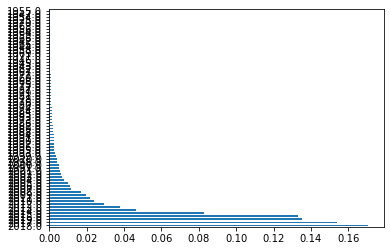

In [25]:
dataset.release_year.value_counts(normalize=True)
dataset.release_year.value_counts(normalize=True).plot.barh()
plt.show()

In [26]:
dataset.release_year.value_counts(normalize=True)

2018.0    0.170571
2017.0    0.153883
2019.0    0.135270
2016.0    0.133184
2015.0    0.082798
            ...   
1970.0    0.000160
1925.0    0.000160
1954.0    0.000160
1947.0    0.000160
1955.0    0.000160
Name: release_year, Length: 72, dtype: float64

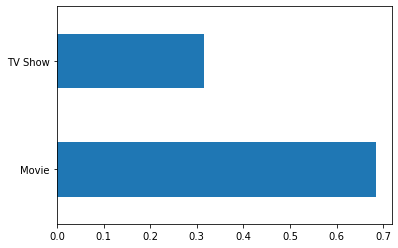

In [27]:
dataset.type.value_counts(normalize=True)
dataset.type.value_counts(normalize=True).plot.barh()
plt.show()

In [28]:
dataset.type.value_counts(normalize=True)

Movie      0.68405
TV Show    0.31595
Name: type, dtype: float64

In [29]:
dataset1 = dataset.head(15)

In [30]:
dataset1

,type,title,date_added,release_year,rating,show_id
0,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,81145628.0
1,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,80117401.0
2,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,70234439.0
3,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,80058654.0
4,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,80125979.0
5,TV Show,Apaches,2017-09-08 00:00:00,2016.0,TV-MA,80163890.0
6,Movie,Automata,2017-09-08 00:00:00,2014.0,R,70304989.0
7,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08 00:00:00,2017.0,TV-MA,80164077.0
8,TV Show,Fire Chasers,2017-09-08 00:00:00,2017.0,TV-MA,80117902.0
9,Movie,Good People,2017-09-08 00:00:00,2014.0,R,70304990.0


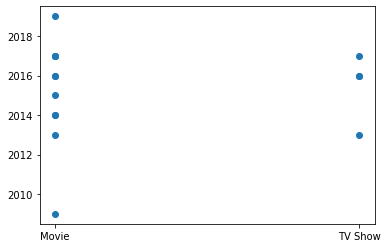

In [31]:
plt.scatter(dataset1.type,dataset1.release_year)
plt.show()

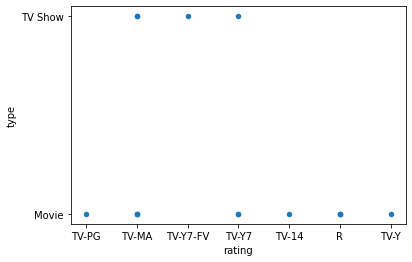

In [32]:
dataset1.plot.scatter(y='type',x='rating')
plt.show()

In [33]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

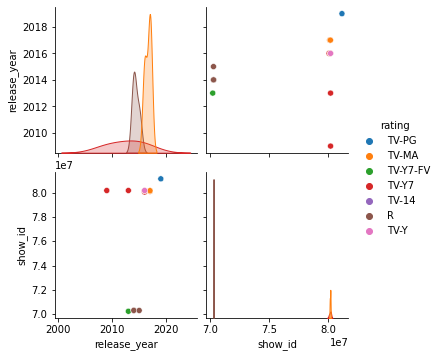

In [34]:
sns.pairplot(data=dataset1 , hue='rating')

<AxesSubplot:>

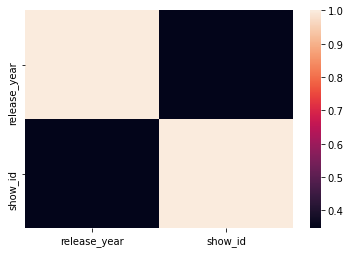

In [35]:
sns.heatmap(dataset1.corr())

In [60]:
target = dataset1['rating']
df = dataset1.copy()
df = df.drop(['rating','title','date_added'],axis=1)

In [61]:
X=df

In [62]:
target

0        TV-PG
1        TV-MA
2     TV-Y7-FV
3        TV-Y7
4        TV-14
5        TV-MA
6            R
7        TV-MA
8        TV-MA
9            R
10       TV-MA
11           R
12       TV-Y7
13       TV-Y7
14        TV-Y
Name: rating, dtype: object

In [63]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import plot_tree

In [64]:
le = LabelEncoder()

In [65]:
target = le.fit_transform(target)
target

array([3, 2, 6, 5, 1, 2, 0, 2, 2, 0, 2, 0, 5, 5, 4])

In [66]:
y=target

In [67]:
li = LabelEncoder()
df['type'] = li.fit_transform(df['type'])
df

,type,release_year,show_id
0,0,2019.0,81145628.0
1,0,2016.0,80117401.0
2,1,2013.0,70234439.0
3,1,2016.0,80058654.0
4,0,2017.0,80125979.0
5,1,2016.0,80163890.0
6,0,2014.0,70304989.0
7,0,2017.0,80164077.0
8,1,2017.0,80117902.0
9,0,2014.0,70304990.0


In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
print("Training split input-",X_train.shape)
print("Testing split input-",X_test.shape)

Training split input- (12, 3)
Testing split input- (3, 3)


In [70]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision tree created")

Decision tree created


In [71]:
y_pred = dtree.predict(X_test)
print("Classiification report - \n",classification_report(y_test,y_pred))

Classiification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Accuracy Score:0.6666666666666666')

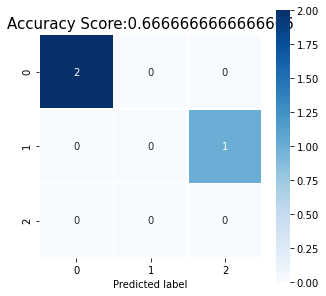

In [74]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=.5 , annot=True,square=True,cmap='Blues')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score:{0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)

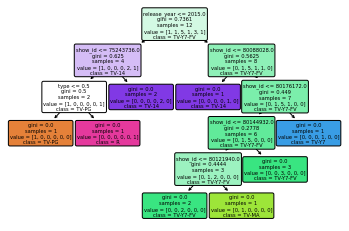

In [76]:
dec_tree = plot_tree(decision_tree=dtree,feature_names = df.columns,class_names=["TV-PG","TV-MA","TV-Y7-FV"
                                                                                 ,"TV-Y7","TV-14","R",
                                                                                 "TV-Y"],filled=True
                     ,precision=4,rounded=True)